In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\Siddharth\\Desktop\\Projects\\Projects\\Marketing_campaign\\loan_acceptors.csv")
#data.head(5)

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 13].values

In [4]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [5]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.grid_search import GridSearchCV

param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17],
              'p':[1,2]}

est = KNeighborsClassifier()
gs_cv = GridSearchCV(est,param_grid,n_jobs=4,cv=5).fit(X_train,y_train)

#best hyperparameter setting
gs_cv.best_params_

{'n_neighbors': 3, 'p': 2}

In [8]:
classifier = KNeighborsClassifier(n_neighbors=3, p=2)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = (tn+tp)/(tn+fp+fn+tp)*100
#model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}%'.format(model_accuracy))

[[907   3]
 [ 27  63]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       910
          1       0.95      0.70      0.81        90

avg / total       0.97      0.97      0.97      1000

Model accuracy: 97.00%


Text(0,0.5,'Mean Error')

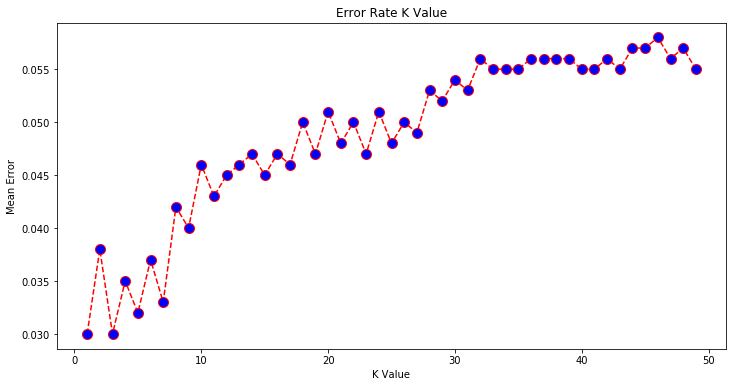

In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1,50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1,50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [14]:
pred_proba = classifier.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

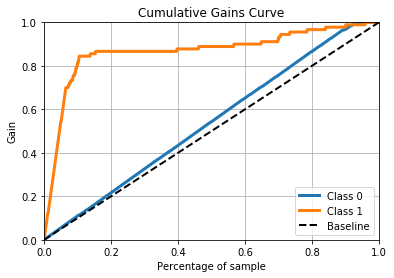

In [19]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, pred_proba)
plt.show()

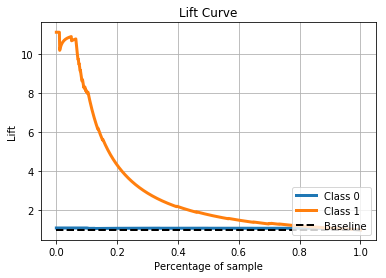

In [23]:
skplt.metrics.plot_lift_curve(y_test, pred_proba)
plt.show()